In [46]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

<Axes: title={'center': 'All-Transactions House Price Index for California'}, xlabel='time', ylabel='Index value'>

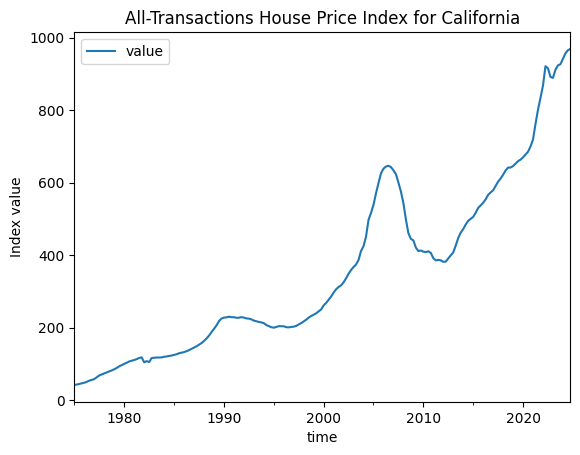

In [47]:
import os

df = pd.read_csv(os.path.join('..', 'Datasets', 'CASTHPI.csv'))
df.rename(columns={'observation_date': 'date', 'CASTHPI': 'value'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['value'] = df['value'].astype('float32')
df.set_index('date', inplace=True)

df.plot(
    xlabel='time',
    ylabel='Index value',
    title='All-Transactions House Price Index for California',
)

In [48]:
df.head()

,value
date,
1975-01-01,41.689999
1975-04-01,42.770000
1975-07-01,44.349998
1975-10-01,45.779999
1976-01-01,47.820000


In [49]:
data = df["value"]
adf_test = adfuller(data)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.396083
p-value: 0.981348


Wniosek: nie można założyć że dane są stacjonarne -> d > 0

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

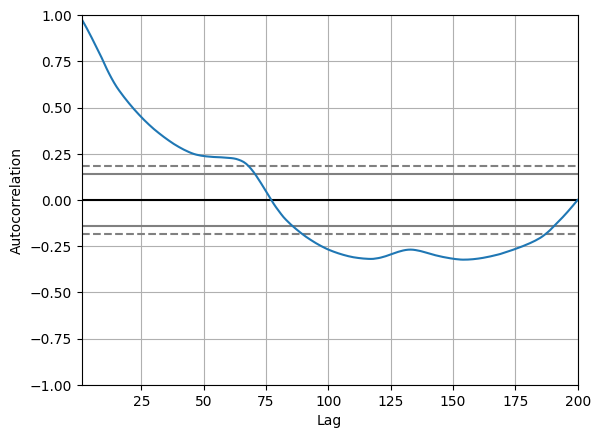

In [50]:
# plot_acf(data, lags=100)
# plot_pacf(data, lags=100)

# plt.figure()
autocorrelation_plot(data)

Wniosek: p = ~15-50

/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  200
Model:                ARIMA(20, 1, 3)   Log Likelihood                -660.859
Date:                Sun, 30 Mar 2025   AIC                           1369.719
Time:                        20:07:22   BIC                           1448.758
Sample:                    01-01-1975   HQIC                          1401.708
                         - 10-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1144      1.698      0.656      0.512      -2.213       4.442
ar.L2         -0.8053      0.404     -1.992      0.046      -1.598      -0.013
ar.L3          1.4293      1.026      1.393      0.1

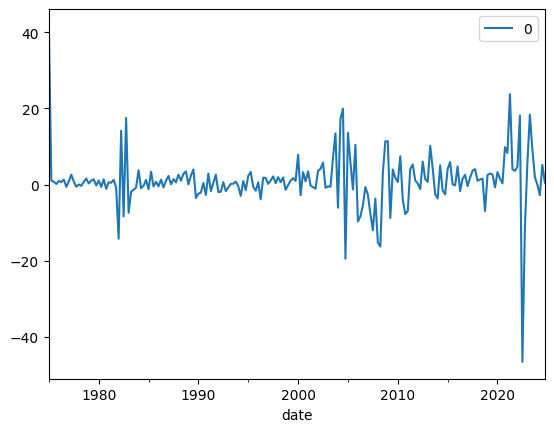

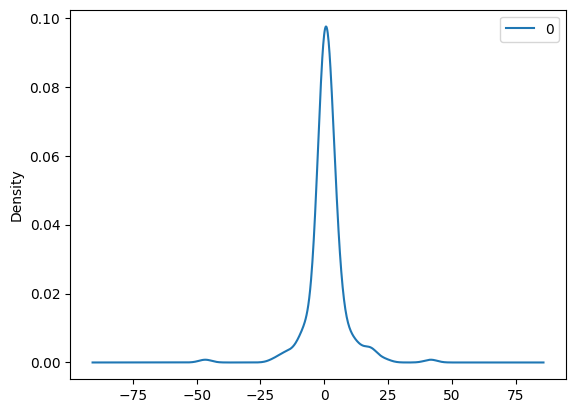

                0
count  200.000000
mean     1.049344
std      7.186757
min    -46.604720
25%     -0.802619
50%      0.723426
75%      2.903916
max     41.689999


In [68]:
model = ARIMA(data, order=(20,1,3))
model_fit = model.fit()
print(model_fit.summary())
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

## Rolling forecast

In [52]:
X = data.values
size = int(len(X) * 0.67)
train, test = X[0: size], X[size: len(X)]
history = list(train)
predictions = []

# walk-forward validation
for i in range(len(test)):
    model = ARIMA(history, order=(20, 1, 3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    y = test[i]
    history.append(y)
    print("predicted=%f, true=%f" % (yhat, y))

/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=458.566252, true=460.489990


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=426.041868, true=444.589996


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=417.430439, true=440.609985


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=424.079058, true=420.510010


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=410.085853, true=411.209991


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=412.738747, true=412.529999


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=416.176871, true=409.480011


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=417.271482, true=408.250000


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=420.126294, true=410.500000


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=417.758113, true=405.980011


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=404.552267, true=391.459991


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=375.858142, true=385.170013


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=369.020267, true=386.769989


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=382.556611, true=385.589996


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=384.151742, true=381.299988


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=382.224145, true=381.929993


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=372.456305, true=390.859985


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=391.314608, true=399.160004


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=413.192809, true=407.579987


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=424.566881, true=426.279999


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=440.946232, true=447.239990


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=461.377480, true=462.079987


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=483.280369, true=471.709991


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=483.814697, true=484.480011


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=491.532928, true=494.609985


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=505.501900, true=500.220001


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=507.672715, true=505.470001


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=504.011777, true=516.789978


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=520.637050, true=529.979980


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=539.719554, true=537.289978


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=546.559249, true=544.330017


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=551.460379, true=553.969971


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=561.814315, true=566.099976


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=575.281644, true=572.909973


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=578.110287, true=578.849976


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=585.555724, true=590.880005


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=598.379845, true=602.650024
predicted=611.564975, true=611.280029


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=618.048625, true=621.729980


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=630.731529, true=633.590027


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=642.508536, true=641.580017


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=648.205917, true=641.510010


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=641.896545, true=645.679993


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=648.098391, true=652.260010


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=653.964821, true=659.159973


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=663.132600, true=663.450012


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=667.376227, true=669.690002


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=674.261179, true=677.369995


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=682.489518, true=685.309998


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=692.448441, true=699.460022


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=712.434284, true=719.039978


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=736.238991, true=761.719971


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=797.535881, true=801.390015


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=837.083977, true=833.859985


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=868.314002, true=867.809998


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=902.311893, true=921.130005


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=970.401112, true=915.450012


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=914.158070, true=891.690002


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=879.691458, true=888.869995


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=876.699569, true=911.510010


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=906.524076, true=923.450012


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=923.094644, true=926.650024


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=942.622850, true=941.179993


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=960.927872, true=956.390015


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=955.300035, true=965.289978
predicted=967.197041, true=968.880005


/home/rynowak/Dokumenty/Programy/EksploracjaDanych/EksploracjaDanych/env/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test MAPE: 0.013


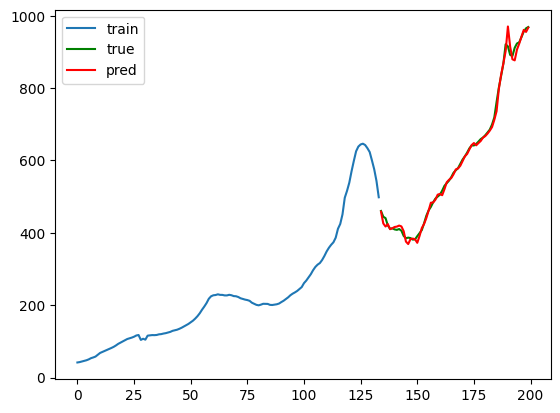

In [ ]:
mape = mean_absolute_percentage_error(test, predictions)
print("Test MAPE: %.3f" % mape)

# plt.plot(train, label='train')
plt.plot(range(len(train), len(data)), test, color='g', label="true")
plt.plot(range(len(train), len(data)), predictions, color="r", label="pred")
plt.legend()
plt.show()